# Class 28 - Maximum Flow

Define an adjacency matrix for a simple directed graph with six vertices, as shown here:

In [1]:
vertex_names <- c("A","B","C","D","E","X")
N <- length(vertex_names)
network <- matrix(rep(0, N^2), ncol=N, dimnames=list(vertex_names, vertex_names))
network["A","X"] <- 1
network["A","E"] <- 1
network["D","E"] <- 1
network["A","B"] <- 1
network["A","C"] <- 1
network["C","X"] <- 1
network["E","X"] <- 1

Make an igraph graph out of this adjacency matrix, and print the graph and its summary:


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



IGRAPH 614158a DN-- 6 7 -- 
+ attr: name (v/c)
IGRAPH 614158a DN-- 6 7 -- 
+ attr: name (v/c)
+ edges from 614158a (vertex names):
[1] A->B A->C A->E A->X C->X D->E E->X


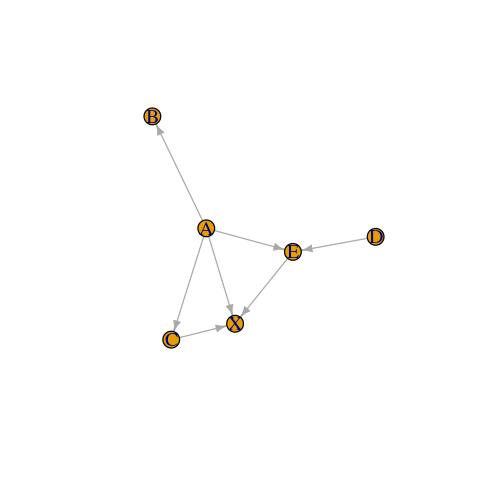

In [2]:
library(igraph)
network_igraph <- graph_from_adjacency_matrix(network)
print(summary(network_igraph))
plot(network_igraph)

Using the `graph.maxflow` function, compute the max-flow between all possible pairs of distinct vertices. Which pair of vertices have the maximum flow between them?  R users, try to do this without a loop (hint, use `expand.grid`, `apply`, and `unlist`).

In [5]:
max_flow_data <- unlist(apply(combn(vertex_names, 2), 2, function(vertex_pair) {
    if (vertex_pair[1] == vertex_pair[2]) {
        return(NULL)
    }
    val1 <- graph.maxflow(network_igraph, source=vertex_pair[1], target=vertex_pair[2])$value
    val2 <- graph.maxflow(network_igraph, source=vertex_pair[2], target=vertex_pair[1])$value
    retlist <- list(val1, val2)
    names(retlist) <- c(paste(vertex_pair[1], vertex_pair[2], sep="_to_"),
                        paste(vertex_pair[2], vertex_pair[1], sep="_to_"))
    retlist
}))

print("The pair of vertices with the maximum flow between them is: ")
print(max_flow_data[which.max(max_flow_data)])

[1] "The pair of vertices with the maximum flow between them is: "
A_to_X 
     3 
